# **Cleaning and EDA**

#### *Imports and Read in Data*

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [197]:
mlb = pd.read_csv('../data/mlb.csv')
print(mlb.shape)
mlb.head()

(3000, 85)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_template_id,is_gallery,distinguished,suggested_sort,gallery_data,media_metadata,author_cakeday,discussion_type,poll_data,banned_by
0,[],False,deliriouz16,NaN,[],NaN,text,t2_7p3cqcb5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Comical_Sports_Memes,NaN,[],NaN,text,t2_3hkmoapb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Comical_Sports_Memes,NaN,[],NaN,text,t2_3hkmoapb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Jay_Subabove,NaN,[],NaN,text,t2_ogi4y19t,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Alex_MurphyUMD,NaN,[],NaN,text,t2_1poon8tg,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
redsox = pd.read_csv('../data/redsox.csv')
print(redsox.shape)
redsox.head()

(3000, 87)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,gallery_data,is_gallery,media_metadata,crosspost_parent,crosspost_parent_list,author_cakeday,poll_data,edited,banned_by,gilded
0,[],False,fsninfo,NaN,[],NaN,text,t2_2ubss2wo,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Cravenmorhed69,NaN,[],NaN,text,t2_e3vq4jj0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,RedSoxGameday,crab,"[{'a': ':crab:', 'e': 'emoji', 'u': 'https://e...",:crab:,richtext,t2_clmhw,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,jidionismydaddy69,NaN,[],NaN,text,t2_ozlcmlgw,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,cheekofin,NaN,[],NaN,text,t2_80qtsd93,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----
#### *Exploring and cleaning the r/mlb data*

In [199]:
# Exploring columns to potentially keep for modelling
mlb.iloc[:, :20].head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui
0,[],False,deliriouz16,NaN,[],NaN,text,t2_7p3cqcb5,False,False,True,[],False,False,1655871788,i.redd.it,https://www.reddit.com/r/mlb/comments/vhwd1v/h...,{},vhwd1v,False
1,[],False,Comical_Sports_Memes,NaN,[],NaN,text,t2_3hkmoapb,False,False,False,[],False,False,1655867264,open.spotify.com,https://www.reddit.com/r/mlb/comments/vhuzb8/h...,{},vhuzb8,False


In [200]:
mlb['author_is_blocked'].value_counts()

False    2906
Name: author_is_blocked, dtype: int64

In [201]:
mlb['author_premium'].value_counts()

False    2737
True      246
Name: author_premium, dtype: int64

In [202]:
mlb.iloc[:,21:41].head(3)

,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink
0,False,False,True,True,False,False,#04ff00,[],fdaf3fe0-a7fb-11ec-bf8f-d68d49957060,Original Content,dark,text,False,False,True,0,0,False,all_ads,/r/mlb/comments/vhwd1v/had_to_make_this_to_cel...
1,False,False,False,False,False,False,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/mlb/comments/vhuzb8/how_crazy_is_it_that_aa...
2,False,False,False,False,False,False,NaN,[],NaN,NaN,dark,text,False,False,True,0,0,False,all_ads,/r/mlb/comments/vhuz1h/are_the_angels_about_to...


In [203]:
mlb[['is_self', 'is_video']].value_counts()

is_self  is_video
False    False       1544
True     False       1401
False    True          55
dtype: int64

In [204]:
mlb['over_18'].value_counts()

False    2986
True       14
Name: over_18, dtype: int64

In [205]:
mlb.iloc[:, 42:62].head(2)

,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio
0,image,"{'enabled': True, 'images': [{'id': 'RLd03S7Gw...",6,1655871799,1,NaN,False,False,False,mlb,t5_2qrrr,236603,public,https://a.thumbs.redditmedia.com/9lKZdmrakYlP4...,140.0,140.0,Had to make this to celebrate Ronalds new home...,0,[],1.0
1,link,"{'enabled': False, 'images': [{'id': 'QGb4lkkK...",6,1655867275,1,NaN,False,False,False,mlb,t5_2qrrr,236525,public,https://a.thumbs.redditmedia.com/c_r2oQS76WD4W...,140.0,140.0,How crazy is it that Aaron Judge might be out ...,0,[],1.0


In [206]:
mlb['score'].value_counts()

1     2934
0       25
2       19
3        7
4        3
18       2
37       1
71       1
30       1
6        1
5        1
7        1
15       1
44       1
66       1
38       1
Name: score, dtype: int64

In [207]:
mlb['post_hint'].value_counts()

link            636
image           511
rich:video      202
self            152
hosted:video     52
gallery           2
Name: post_hint, dtype: int64

In [208]:
(mlb['selftext'] == '[removed]').sum()

250

In [209]:
(mlb['selftext'] == '[deleted]').sum()

13

In [210]:
mlb['upvote_ratio'].value_counts()

1.00    2846
0.99     103
0.50      18
0.75       6
0.67       4
0.25       3
0.89       3
0.80       2
0.91       2
0.71       2
0.83       2
0.40       1
0.45       1
0.38       1
0.88       1
0.85       1
0.66       1
0.81       1
0.20       1
0.98       1
Name: upvote_ratio, dtype: int64

In [211]:
mlb.iloc[:,63:].head(3)

,url_overridden_by_dest,whitelist_status,wls,media,media_embed,removed_by_category,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,...,author_flair_template_id,is_gallery,distinguished,suggested_sort,gallery_data,media_metadata,author_cakeday,discussion_type,poll_data,banned_by
0,https://i.redd.it/8m4kmeagn3791.jpg,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://open.spotify.com/episode/1tCNG4sDjT5OF...,all_ads,6,{'oembed': {'description': 'Listen to this epi...,"{'content': '&lt;iframe class=""embedly-embed"" ...",reddit,{'oembed': {'description': 'Listen to this epi...,"{'content': '&lt;iframe class=""embedly-embed"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://podcasts.apple.com/us/podcast/take-it-...,all_ads,6,NaN,NaN,reddit,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
mlb['author'].value_counts()

PrincessBananas85    115
retroanduwu24        107
trixster110497        73
Namechicagoinu        60
TalkinMetsWithRob     38
                    ... 
KCROYAL4               1
mhmagic44              1
Hooloovoo_42           1
BeerInTheRear          1
YoHoochIsCrazy         1
Name: author, Length: 1751, dtype: int64

In [213]:
# narrow columns to ones we want to look at further
mlb = mlb[['subreddit', 'author', 'selftext', 'created_utc', 'author_premium','is_video','score','title', 'upvote_ratio','num_comments']]

print(mlb.shape)
mlb.head(2)

(3000, 10)


,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments
0,mlb,deliriouz16,NaN,1655871788,True,False,1,Had to make this to celebrate Ronalds new home...,1.0,0
1,mlb,Comical_Sports_Memes,NaN,1655867264,False,False,1,How crazy is it that Aaron Judge might be out ...,1.0,0


In [214]:
# examine nulls and potential rows to drop
# drop all rows where text is null
mlb.isnull().sum()

subreddit            0
author               0
selftext          1741
created_utc          0
author_premium      17
is_video             0
score                0
title                0
upvote_ratio         0
num_comments         0
dtype: int64

In [215]:
mlb.dropna(subset = 'selftext',inplace=True)
mlb.isnull().sum()

subreddit          0
author             0
selftext           0
created_utc        0
author_premium    13
is_video           0
score              0
title              0
upvote_ratio       0
num_comments       0
dtype: int64

In [216]:
mlb[mlb['is_video'] == True]

,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments
1653,mlb,[deleted],[deleted],1638973022,NaN,True,1,It's lockout season and we're all just a baseb...,1.0,0


In [217]:
mlb.shape

(1259, 10)

In [218]:
# drop ones with text removed or deleted
mlb = mlb[(mlb['selftext'] != '[removed]') | (mlb['selftext'] != '[deleted]')]

In [219]:
print(mlb.shape)
print(mlb.isnull().sum())

(1259, 10)
subreddit          0
author             0
selftext           0
created_utc        0
author_premium    13
is_video           0
score              0
title              0
upvote_ratio       0
num_comments       0
dtype: int64


In [220]:
mlb['author'].value_counts()

trixster110497       69
Tal_Venada           28
Keith_H25            21
retroanduwu24        15
TalkinMetsWithRob    14
                     ..
BronYrStomp           1
MelmothTheBee         1
EastPitch3511         1
swizzie_swain         1
yoMiiro               1
Name: author, Length: 866, dtype: int64

In [221]:
# look into the length and word count of posts
# create new columns for post lengths
mlb['post_char_length'] = [len(str(i)) for i in mlb['selftext']]
mlb['post_word_count'] = [len(str(i).split(" ")) for i in mlb['selftext']]
mlb.head(2)

,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments,post_char_length,post_word_count
3,mlb,Jay_Subabove,"This batter is hitting .191 with 3HR, 12 RBI, ...",1655862592,False,False,1,Am I crazy?,1.0,0,263,53
8,mlb,Stress_Factor,"Not a Yankees fan, but modern day record looki...",1655856890,False,False,1,MLB Record (Wins),1.0,0,96,19


-----
#### *Exploring and cleaning the r/redsox data*

In [222]:
redsox.iloc[:,:20].head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui
0,[],False,fsninfo,NaN,[],NaN,text,t2_2ubss2wo,False,False,False,[],False,False,1655869523,youtube.com,https://www.reddit.com/r/redsox/comments/vhvoa...,{},vhvoa9,False
1,[],False,Cravenmorhed69,NaN,[],NaN,text,t2_e3vq4jj0,False,False,False,[],False,False,1655868804,i.redd.it,https://www.reddit.com/r/redsox/comments/vhvgg...,{},vhvggq,False


In [223]:
redsox.iloc[:,21:41].head(3)

,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,no_follow,num_comments,num_crossposts,over_18
0,False,False,False,True,False,False,NaN,vid,"[{'e': 'text', 't': 'VIDEO'}]",VIDEO,dark,richtext,False,{'oembed': {'author_name': 'Final Score Networ...,"{'content': '&lt;iframe width=""356"" height=""20...",False,True,0,0,False
1,False,False,True,True,False,False,NaN,img,"[{'e': 'text', 't': 'IMAGE'}]",IMAGE,dark,richtext,False,NaN,NaN,False,True,0,0,False
2,False,False,False,True,True,False,#9e8d49,pgt,"[{'e': 'text', 't': 'POST GAME THREAD'}]",POST GAME THREAD,light,richtext,False,NaN,NaN,False,True,0,0,False


In [224]:
redsox[['author_is_blocked','is_video','num_comments']].value_counts()

author_is_blocked  is_video  num_comments
False              False     0               2074
                             1                 69
                   True      0                 63
                   False     2                 59
                             3                 47
                                             ... 
                             180                1
                             195                1
                             199                1
                             201                1
                   True      198                1
Length: 141, dtype: int64

In [225]:
redsox.iloc[:,42:62].head(3)

,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width
0,/r/redsox/comments/vhvoa9/tigers_vs_red_sox_ga...,False,rich:video,"{'enabled': False, 'images': [{'id': 'g_xOktdG...",6,1655869534,1,{'oembed': {'author_name': 'Final Score Networ...,"{'content': '&lt;iframe width=""356"" height=""20...",NaN,True,False,False,redsox,t5_2qh95,143741,public,https://b.thumbs.redditmedia.com/3fbjwyIUpRlJr...,105.0,140.0
1,/r/redsox/comments/vhvggq/report_alex_cora_to_...,False,image,"{'enabled': True, 'images': [{'id': 'VXnY39fFO...",6,1655868814,1,NaN,NaN,NaN,False,False,False,redsox,t5_2qh95,143741,public,https://b.thumbs.redditmedia.com/01OSMw9DONG6e...,118.0,140.0
2,/r/redsox/comments/vhtt1e/post_game_thread_621...,False,NaN,NaN,6,1655863649,1,NaN,NaN,### Line Score - Final\n\n| |1|2|3|4|5|6|7|8|9...,False,False,False,redsox,t5_2qh95,143726,public,self,NaN,NaN


In [226]:
(redsox['selftext'] == '[removed]').sum()

566

In [227]:
(redsox['selftext'] == '[deleted]').sum()

18

In [228]:
redsox.iloc[:,63:].head(2)

,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,author_flair_template_id,author_flair_text_color,link_flair_template_id,...,gallery_data,is_gallery,media_metadata,crosspost_parent,crosspost_parent_list,author_cakeday,poll_data,edited,banned_by,gilded
0,0,[],1.0,https://youtube.com/watch?v=L73SqRs8Ft0&amp;fe...,https://youtube.com/watch?v=L73SqRs8Ft0&amp;fe...,all_ads,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,[],1.0,https://i.redd.it/yfi0m91le3791.jpg,https://i.redd.it/yfi0m91le3791.jpg,all_ads,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
redsox['author_premium'].value_counts()

False    2806
True      174
Name: author_premium, dtype: int64

In [230]:
# narrow columns to ones we want to look at further
redsox = redsox[['subreddit', 'author', 'selftext', 'created_utc', 'author_premium','is_video','score','title', 'upvote_ratio','num_comments']]

print(redsox.shape)
redsox.head(3)

(3000, 10)


,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments
0,redsox,fsninfo,NaN,1655869523,False,False,1,Tigers vs Red Sox Game Preview and Prediction,1.0,0
1,redsox,Cravenmorhed69,NaN,1655868804,False,False,1,Report: Alex Cora to rest Devers and Bogaerts ...,1.0,0
2,redsox,RedSoxGameday,### Line Score - Final\n\n| |1|2|3|4|5|6|7|8|9...,1655863639,False,False,1,Post Game Thread: 6/21 Tigers @ Red Sox,1.0,0


In [231]:
# examine nulls and potential rows to drop
redsox.isnull().sum()

subreddit            0
author               0
selftext          1740
created_utc          0
author_premium      20
is_video             0
score                0
title                0
upvote_ratio         0
num_comments         0
dtype: int64

In [232]:
redsox.dropna(subset = 'selftext',inplace=True)
redsox.isnull().sum()

subreddit          0
author             0
selftext           0
created_utc        0
author_premium    18
is_video           0
score              0
title              0
upvote_ratio       0
num_comments       0
dtype: int64

In [233]:
redsox.shape

(1260, 10)

In [234]:
# drop is video? is self? 
(redsox['is_video'] == True).sum()

0

In [235]:
# drop ones with text removed or deleted
redsox = redsox[(redsox['selftext'] != '[removed]') | (redsox['selftext'] != '[deleted]')]
redsox.shape

(1260, 10)

In [236]:
redsox['author'].value_counts()

RedSoxGameday        127
[deleted]             18
3ric8223              16
canitryto             15
littleike0             8
                    ... 
kanerstaxiservice      1
iiGoodVibesii          1
Hintonburgheart        1
s-hellman              1
ASH3N_                 1
Name: author, Length: 772, dtype: int64

In [237]:
# Note RedSoxGameday account (more information for each game and likely less
# indicative of sentiment or fan opinion

In [238]:
mlb.shape

(1259, 12)

In [239]:
# look into the length and word count of posts
# create new columns for post lengths
redsox['post_char_length'] = [len(str(i)) for i in redsox['selftext']]
redsox['post_word_count'] = [len(str(i).split(" ")) for i in redsox['selftext']]
redsox.head(2)

,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments,post_char_length,post_word_count
2,redsox,RedSoxGameday,### Line Score - Final\n\n| |1|2|3|4|5|6|7|8|9...,1655863639,False,False,1,Post Game Thread: 6/21 Tigers @ Red Sox,1.0,0,3163,209
3,redsox,jidionismydaddy69,[removed],1655861665,False,False,1,Red Sox Code Word June 21 2022,1.0,0,9,1


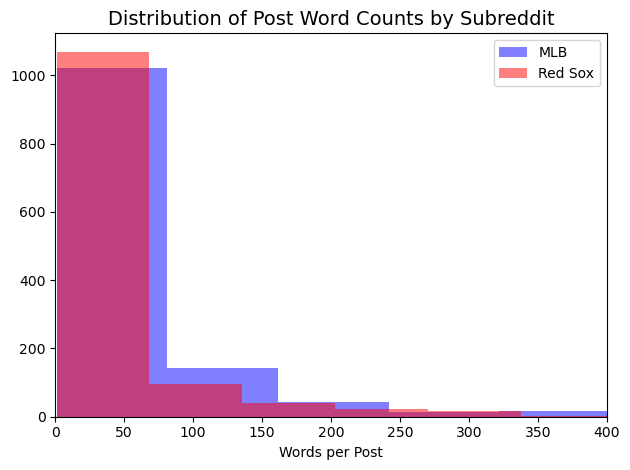

In [296]:
# Use sns.distplot() to visualize the distribution of status 
# word counts for posts by users 

font = {'size': 14}

plt.hist(mlb['post_word_count'], color = 'b', alpha=0.5, label='MLB', bins=20)
plt.hist(redsox['post_word_count'], color = 'r', alpha=0.5, label='Red Sox', bins=20)
plt.legend()
plt.title('Distribution of Post Word Counts by Subreddit', fontdict= font)
plt.xlim(0,400)
plt.xlabel('Words per Post');

# save for presentation
plt.style.use('default')
plt.tight_layout()
plt.savefig('../images/word_count_dist.png')

Text(0.5, 0, 'Characters per Post')

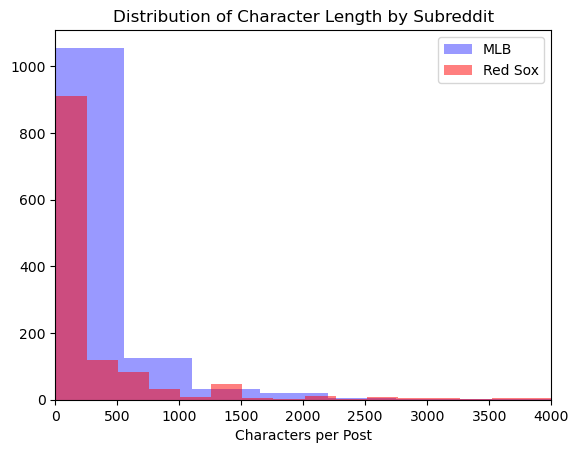

In [241]:
# Use sns.distplot() to visualize the distribution of status 
# character lengths for posts by users 

plt.hist(mlb['post_char_length'], color = 'b', alpha=0.4, label='MLB', bins=30)
plt.hist(redsox['post_char_length'], color = 'r', alpha=0.5, label='Red Sox', bins=30)
plt.legend()
plt.title('Distribution of Character Length by Subreddit')
plt.xlim(0,4_000)
plt.xlabel('Characters per Post')

-----
## **EDA**
### *Combine the dataframes for further exploration*

In [242]:
reddit = pd.concat(objs = [mlb, redsox], join='outer', ignore_index=True)
reddit.shape

(2519, 12)

In [243]:
# look into the length and word count of posts
# create new columns for post lengths
reddit['post_char_length'] = [len(str(i)) for i in reddit['selftext']]
reddit['post_word_count'] = [len(str(i).split(" ")) for i in reddit['selftext']]
reddit.head(2)

,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments,post_char_length,post_word_count
0,mlb,Jay_Subabove,"This batter is hitting .191 with 3HR, 12 RBI, ...",1655862592,False,False,1,Am I crazy?,1.0,0,263,53
1,mlb,Stress_Factor,"Not a Yankees fan, but modern day record looki...",1655856890,False,False,1,MLB Record (Wins),1.0,0,96,19


In [244]:
# looking at longest and shortest posts
print(reddit[['author','post_char_length','subreddit']].sort_values('post_char_length', ascending=False).head(5))
print("-"*40)
print(reddit[['author','post_word_count', 'subreddit']].sort_values('post_word_count', ascending=False).head(5))

#try to plot on same chart with different color groupings

             author  post_char_length subreddit
198   ASquareBettor             16492       mlb
593   Arctic_Summer              8878       mlb
690        jsoares7              8203       mlb
682        jsoares7              8203       mlb
2410  RedSoxGameday              7539    redsox
----------------------------------------
             author  post_word_count subreddit
593   Arctic_Summer             1607       mlb
690        jsoares7             1439       mlb
682        jsoares7             1439       mlb
2309    phabphour20             1347    redsox
724         Gemnist             1313       mlb


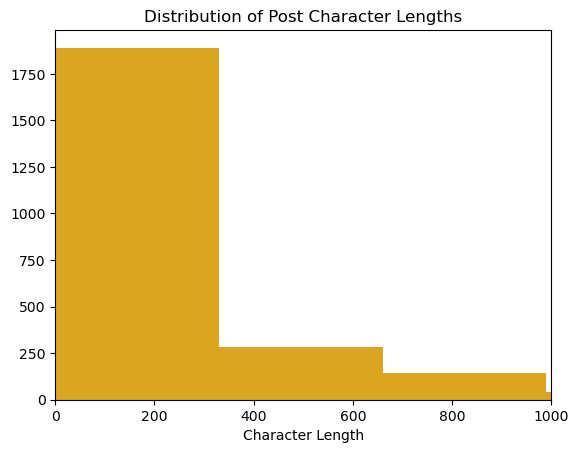

In [245]:
# histogram showing distribution of post length 

plt.hist(reddit['post_char_length'],
        bins = 50,
        color = 'goldenrod')
plt.title('Distribution of Post Character Lengths')
plt.xlabel('Character Length');
plt.xlim(0,1000);


(0.0, 200.0)

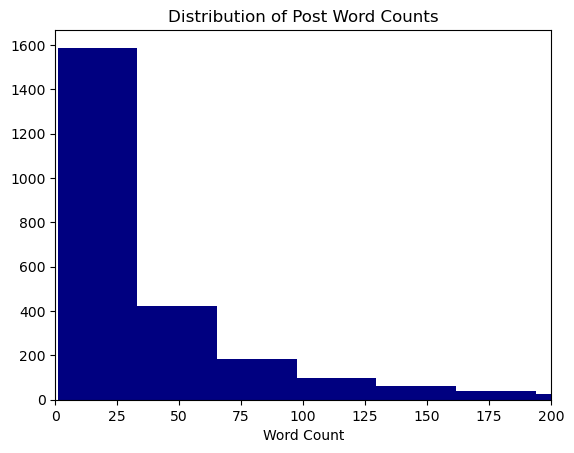

In [246]:
# histogram showing distribution of word counts 
plt.hist(reddit['post_word_count'],
        bins = 50,
        color = 'navy')
plt.title('Distribution of Post Word Counts')
plt.xlabel('Word Count');
plt.xlim(0,200)

(0.0, 250.0)

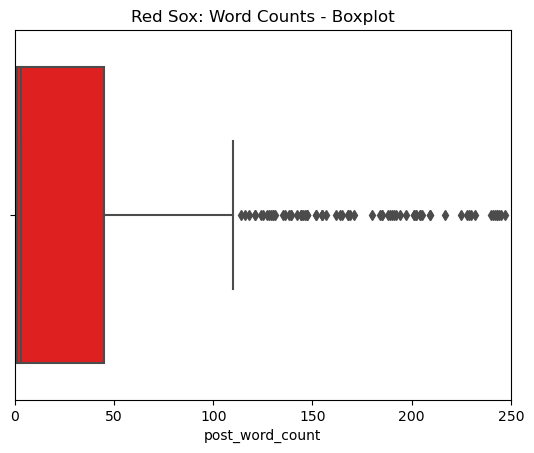

In [247]:
plt.title('Red Sox: Word Counts - Boxplot')
sns.boxplot(x = redsox['post_word_count'], color = 'r')
plt.xlim(0,250)

(0.0, 1000.0)

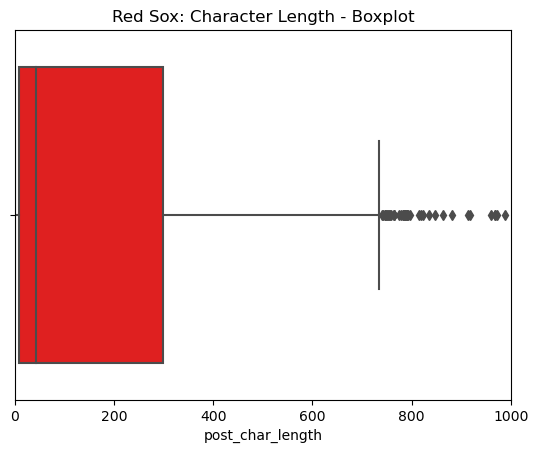

In [248]:
plt.title('Red Sox: Character Length - Boxplot')
sns.boxplot(x = redsox['post_char_length'], color = 'r')
plt.xlim(0,1_000)

In [249]:
redsox[['post_word_count', 'post_char_length']].describe()

,post_word_count,post_char_length
count,1260.000000,1260.000000
mean,39.213492,343.763492
std,86.034025,768.540329
min,1.000000,1.000000
25%,1.000000,9.000000
50%,3.000000,42.000000
75%,45.000000,299.000000
max,1347.000000,7539.000000


In [250]:
mlb[['post_word_count', 'post_char_length']].describe()

,post_word_count,post_char_length
count,1259.000000,1259.000000
mean,61.498014,377.250199
std,138.674341,911.114719
min,1.000000,1.000000
25%,2.000000,49.000000
50%,25.000000,164.000000
75%,64.000000,358.500000
max,1607.000000,16492.000000


In [251]:
# identify outliers 
# for character and words columns in red sox and mlb 
# apply to both through combined df

In [252]:
# function calculates lower (25th % - 1.5(IQR)) and upper (75th % + 1.5(IQR)) bounds
# framework to remove outliers
def calc_bounds(column):
    IQR = (redsox[column].quantile(0.75) - redsox[column].quantile(0.25))
    lower_bound = redsox[column].quantile(0.25) - (1.5 * IQR)
    upper_bound = redsox[column].quantile(0.75) + (1.5 * IQR)
   
    return f"redsox = redsox[(redsox['{column}'] > 0) & (redsox['{column}'] < {upper_bound})]"

In [253]:
print(calc_bounds('post_word_count'))

redsox = redsox[(redsox['post_word_count'] > 0) & (redsox['post_word_count'] < 111.0)]


In [254]:
print(calc_bounds('post_char_length'))

redsox = redsox[(redsox['post_char_length'] > 0) & (redsox['post_char_length'] < 734.0)]


(0.0, 250.0)

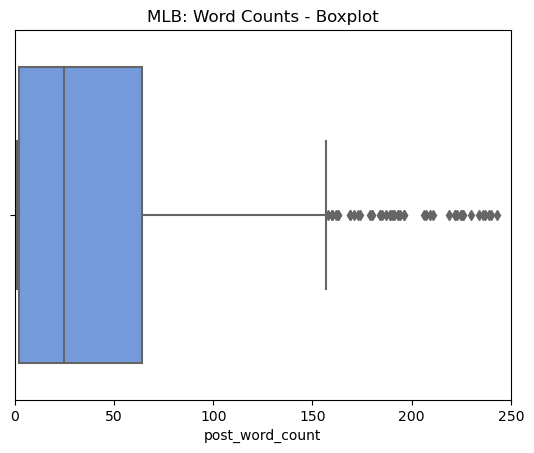

In [255]:
plt.title('MLB: Word Counts - Boxplot')
sns.boxplot(x = mlb['post_word_count'], color = 'cornflowerblue')
plt.xlim(0,250)

(0.0, 1000.0)

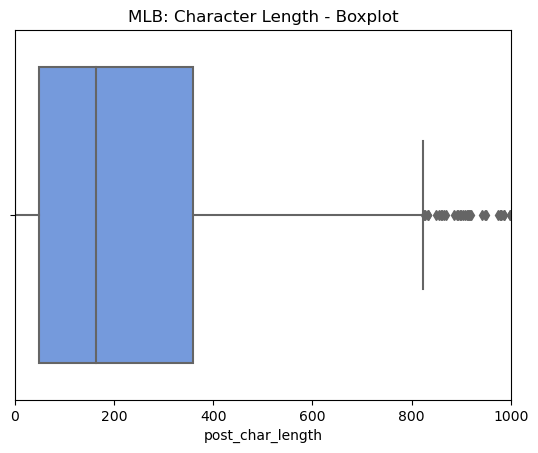

In [256]:
plt.title('MLB: Character Length - Boxplot')
sns.boxplot(x = mlb['post_char_length'], color = 'cornflowerblue')
plt.xlim(0,1000)

In [257]:
def calc_bounds(column):
    IQR = (mlb[column].quantile(0.75) - mlb[column].quantile(0.25))
    lower_bound = mlb[column].quantile(0.25) - (1.5 * IQR)
    upper_bound = mlb[column].quantile(0.75) + (1.5 * IQR)
   
    return f"mlb = mlb[(mlb['{column}'] > 0) & (mlb['{column}'] < {upper_bound})]"

In [258]:
print(calc_bounds('post_word_count'))

mlb = mlb[(mlb['post_word_count'] > 0) & (mlb['post_word_count'] < 157.0)]


In [259]:
print(calc_bounds('post_char_length'))

mlb = mlb[(mlb['post_char_length'] > 0) & (mlb['post_char_length'] < 822.75)]


In [260]:
# Outliers - remove rows where characters are greater than 822.75 or word counts greater than 157
# focused on the larger max bound of the two subreddit groups to ensure consistency across subreddit types

#reddit = reddit[(reddit['post_char_length'] <= 822.75) & (reddit['post_word_count'] <= 157)]
#reddit.shape

Note: *Initially removed outliers before models - however models reacted better to test data when these were kept in the dataset. Hence, why the code has been commented out.*

In [261]:
print('MLB upvote distribution:\n', mlb['upvote_ratio'].value_counts().head(6));
print(" ")
print('RedSox upvote distribution:\n', redsox['upvote_ratio'].value_counts().head(10));

MLB upvote distribution:
 1.00    1234
0.99       8
0.50       5
0.67       3
0.25       2
0.88       1
Name: upvote_ratio, dtype: int64
 
RedSox upvote distribution:
 1.00    1225
0.99       6
0.95       4
0.67       3
0.75       3
0.94       2
0.96       2
0.80       2
0.78       2
0.60       1
Name: upvote_ratio, dtype: int64


In [262]:
print('MLB comments:\n', mlb['num_comments'].value_counts().head());
print(" ")
print('RedSox comments:\n', redsox['num_comments'].value_counts().head(5));

MLB comments:
 0    842
1     41
2     40
3     36
6     28
Name: num_comments, dtype: int64
 
RedSox comments:
 0    1008
1      20
2      17
4      13
8      13
Name: num_comments, dtype: int64


In [263]:
# Examining highest volume authors
reddit['author'].value_counts().head(10)

RedSoxGameday        127
trixster110497        69
[deleted]             31
Tal_Venada            28
Keith_H25             21
lordbloodstar         18
3ric8223              16
TalkinMetsWithRob     15
retroanduwu24         15
canitryto             15
Name: author, dtype: int64

----
#### Because many users have multiple posts and some users post in especially high volumes - *(example: trixster110497)*
#### Evaluating sentmiment on the overall page may be misleading if the high volume-posters are heavily negative or positive (want to be mindful of that when checking sentiment scores for each).

In [264]:
unique_users = reddit.drop_duplicates('author')
print(unique_users.shape)
unique_users.describe()

(1623, 12)


,created_utc,score,upvote_ratio,num_comments,post_char_length,post_word_count
count,1.623000e+03,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000
mean,1.643081e+09,1.280961,0.995022,4.640173,250.756007,41.816389
std,8.762201e+06,6.502389,0.044052,18.108385,653.435526,88.621555
min,1.626287e+09,0.000000,0.250000,0.000000,1.000000,1.000000
25%,1.634962e+09,1.000000,1.000000,0.000000,9.000000,1.000000
50%,1.644346e+09,1.000000,1.000000,0.000000,102.000000,17.000000
75%,1.650850e+09,1.000000,1.000000,1.000000,278.500000,51.000000
max,1.655864e+09,257.000000,1.000000,390.000000,16492.000000,1439.000000


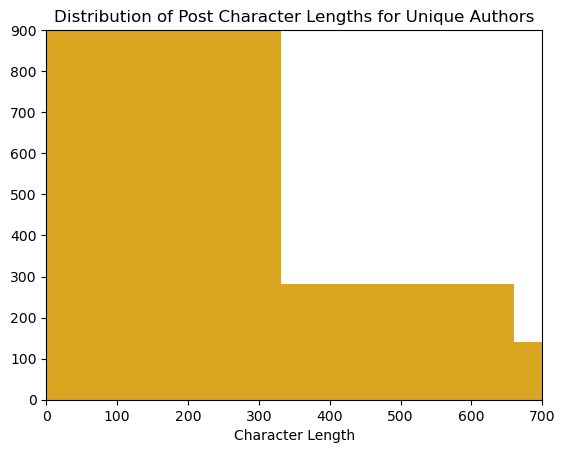

In [265]:
# histogram showing distribution of post length (unique authors)

plt.hist(reddit['post_char_length'],
        bins = 50,
        color = 'goldenrod')
plt.title('Distribution of Post Character Lengths for Unique Authors')
plt.xlabel('Character Length');
plt.xlim(0,700);
plt.ylim(0,900);

(0.0, 1100.0)

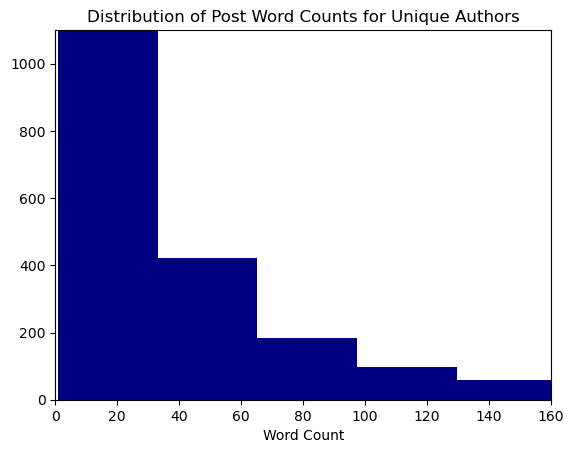

In [266]:
# histogram showing distribution of word counts (unique authors)
plt.hist(reddit['post_word_count'],
        bins = 50,
        color = 'navy')
plt.title('Distribution of Post Word Counts for Unique Authors')
plt.xlabel('Word Count');
plt.xlim(0,160),
plt.ylim(0,1100)

-----
Exploring relationships between authors and whether they're in r/mlb or r/redsox

In [267]:
unique_users['subreddit'].value_counts()#.plot(kind = 'barh')
#plt.title('Unique Authors in Each Subreddit Category');
#plt.xlabel('Authors');

# save for presentation
#plt.tight_layout()
#plt.savefig('../images/unique_authors.png')

mlb       866
redsox    757
Name: subreddit, dtype: int64

In [268]:
# assign mlb to 0 and redsox to 1
reddit['subreddit'] = reddit['subreddit'].map({'mlb': 0, 'redsox': 1})
reddit['subreddit'].value_counts()

1    1260
0    1259
Name: subreddit, dtype: int64

In [269]:
reddit.corr()[['subreddit']].sort_values(by='subreddit', ascending=False)

,subreddit
subreddit,1.000000
created_utc,0.225488
score,0.056659
num_comments,0.025555
upvote_ratio,0.025208
post_char_length,-0.019870
is_video,-0.019936
post_word_count,-0.096156


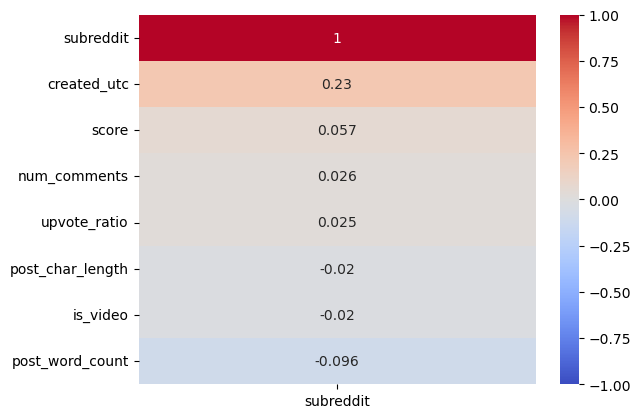

In [270]:
sns.heatmap(reddit.corr()[['subreddit']].sort_values(by = 'subreddit', ascending=False), 
            annot=True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');  

---

## EDA on Text Column

### Vectorize the text using both CountVectorizer and TfidfVectorizer - break out by subreddit and overall

CountVectorize
-----
Red Sox First

In [271]:
# Instantiate the CountVectorizer and transform 
cvec = CountVectorizer()
post_matrix = cvec.fit_transform(redsox['selftext'])

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = cvec.get_feature_names_out())
post_df.shape

(1260, 6980)

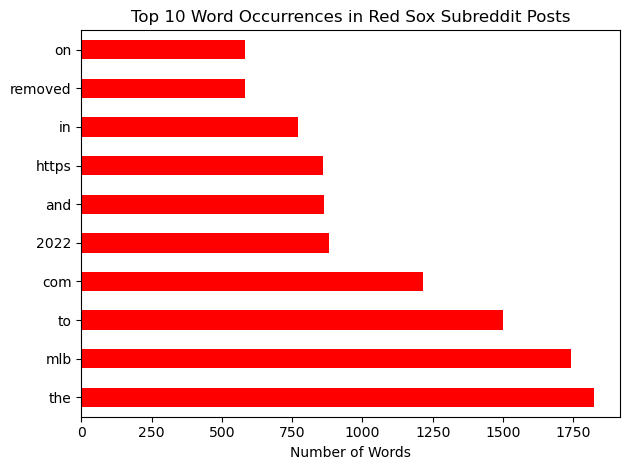

In [272]:
# check to see the top words - if mostly stopwords, get rid of stopwords
# code taken from lesson 5.05 on Natural Language Processing
post_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'r');

# save for presentation
plt.title('Top 10 Word Occurrences in Red Sox Subreddit Posts')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.savefig('../images/sox_topwords_prestop.png')

In [273]:
stopword_list = stopwords.words('english')
print(type(stopword_list))

<class 'list'>


In [274]:
new_words = ['removed', 'poll','https','com','www','reddit', 'asset_1280x720_59_4000k', 'csvm', 'http', 'mp4','diamondx64','jsp']
for i in new_words:
    stopword_list.append(i)

print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

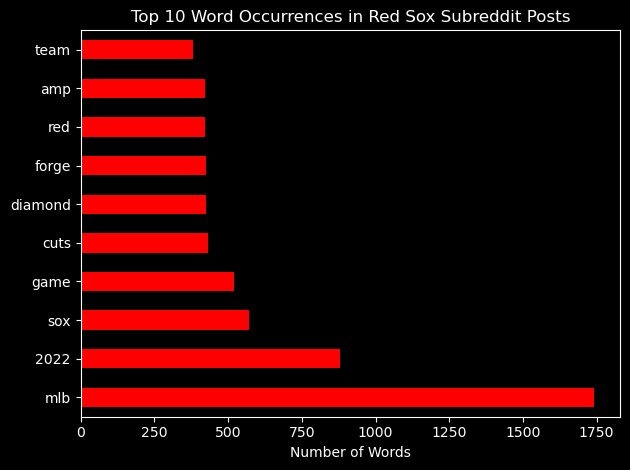

In [298]:
# most are stop words - recreate dataframe without stopwords
cvec = CountVectorizer(stop_words=stopword_list)
post_matrix = cvec.fit_transform(redsox['selftext'])

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
post_df.shape

post_df.sum().sort_values(ascending=False).head(10).plot(kind = 'barh', color='r');

plt.style.use('dark_background')

# save for presentation
plt.title('Top 10 Word Occurrences in Red Sox Subreddit Posts')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.savefig('../images/sox_topwords_dark.png')

MLB

In [276]:
# Instantiate the CountVectorizer and transform 
cvec = CountVectorizer()
post_matrix = cvec.fit_transform(mlb['selftext'])

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = cvec.get_feature_names_out())
post_df.shape

(1259, 8077)

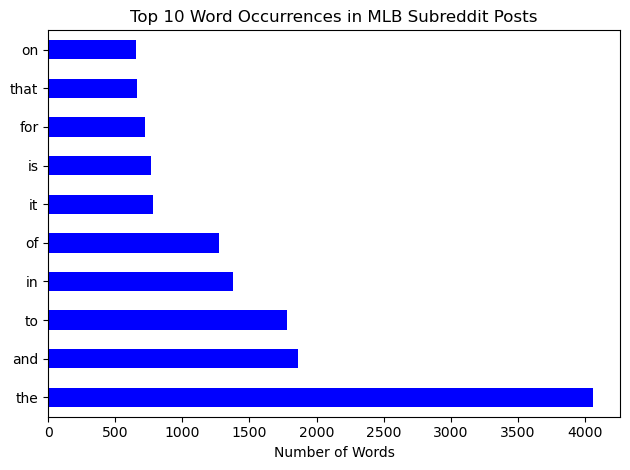

In [277]:
# check to see the top words - if mostly stopwords, get rid of stopwords
# code taken from lesson 5.05 on Natural Language Processing
post_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color='b');

plt.title('Top 10 Word Occurrences in MLB Subreddit Posts')
plt.xlabel('Number of Words')

plt.tight_layout()
plt.savefig('../images/mlb_topwords_prestop')

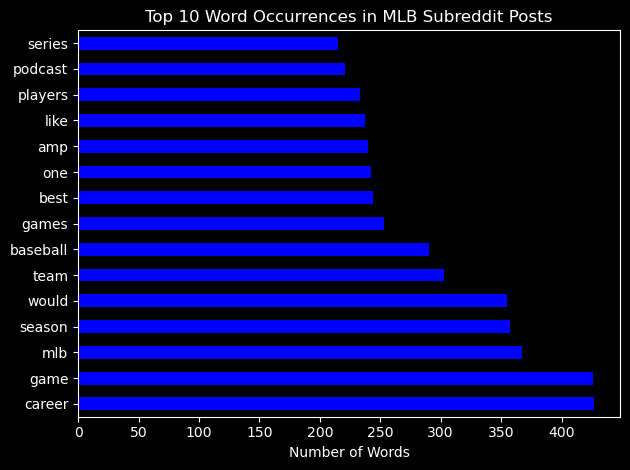

In [299]:
# most are stop words - recreate dataframe without stopwords
cvec = CountVectorizer(stop_words=stopword_list)
post_matrix = cvec.fit_transform(mlb['selftext'])

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
post_df.shape

post_df.sum().sort_values(ascending=False).head(15).plot(kind = 'barh', color='b');


# save for presentation
plt.title('Top 10 Word Occurrences in MLB Subreddit Posts')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.savefig('../images/mlb_topwords_dark.png')

Overall (including both redsox and mlb subreddits)

(2519, 11880)


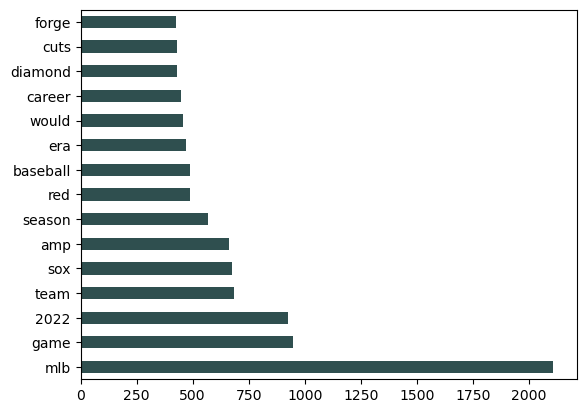

In [279]:
# most are stop words - recreate dataframe without stopwords
cvec = CountVectorizer(stop_words=stopword_list)
post_matrix = cvec.fit_transform(reddit['selftext'])

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
print(post_df.shape)

post_df.sum().sort_values(ascending=False).head(15).plot(kind = 'barh', color='darkslategray');

(TF-IDF) Vectorizer
----
Red Sox first

In [280]:
# Instantiate the Tfidf Vectorizer and transform 
tvec = TfidfVectorizer()
post_matrix = tvec.fit_transform(redsox['selftext'])

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = tvec.get_feature_names_out())
post_df.shape

(1260, 6980)

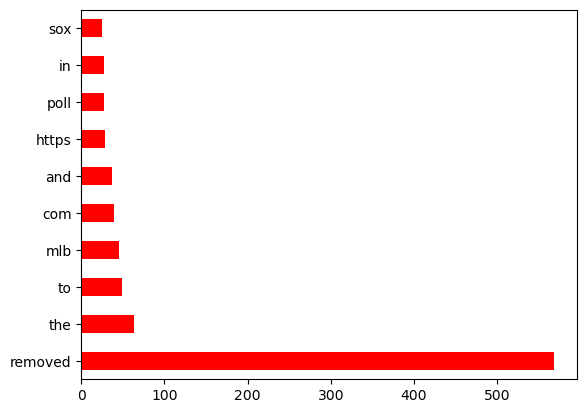

In [281]:
# check to see the top words - if mostly stopwords, get rid of stopwords
# code taken from lesson 5.05 on Natural Language Processing
post_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'r');

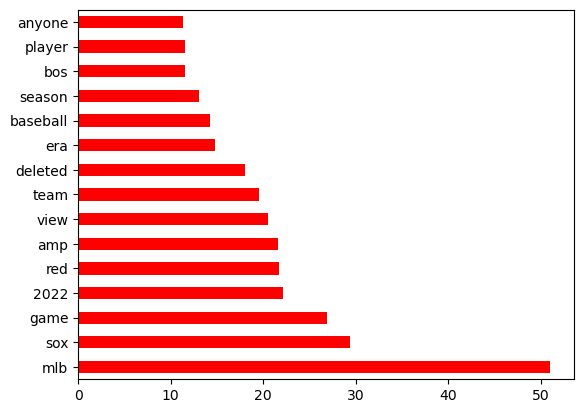

In [282]:
# most are stop words - recreate dataframe without stopwords
tvec = TfidfVectorizer(stop_words=stopword_list)
post_matrix = tvec.fit_transform(redsox['selftext'])

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = tvec.get_feature_names_out())
post_df.shape

post_df.sum().sort_values(ascending=False).head(15).plot(kind = 'barh', color='r');

Now MLB

In [283]:
# Instantiate the Tfidf Vectorizer and transform 
tvec = TfidfVectorizer()
post_matrix = tvec.fit_transform(mlb['selftext'])

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = tvec.get_feature_names_out())
post_df.shape

(1259, 8077)

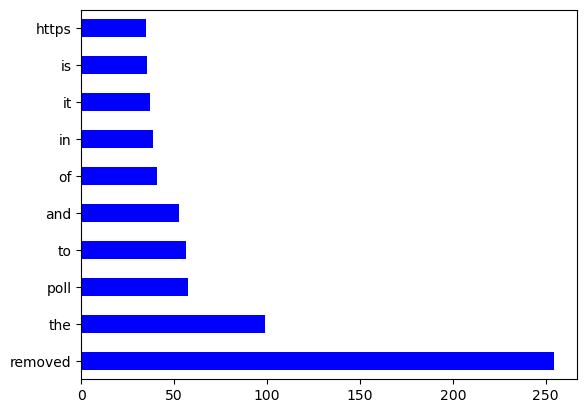

In [284]:
# check to see the top words - if mostly stopwords, get rid of stopwords
post_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh', color = 'b');

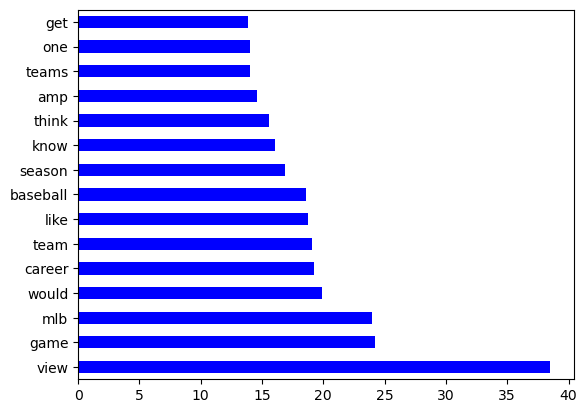

In [285]:
#recreate dataframe without stopwords
tvec = TfidfVectorizer(stop_words=stopword_list)
post_matrix = tvec.fit_transform(mlb['selftext'])

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = tvec.get_feature_names_out())
post_df.shape

post_df.sum().sort_values(ascending=False).head(15).plot(kind = 'barh', color='b');

Overall (including both the MLB and Red Sox subreddits)

(2519, 11880)


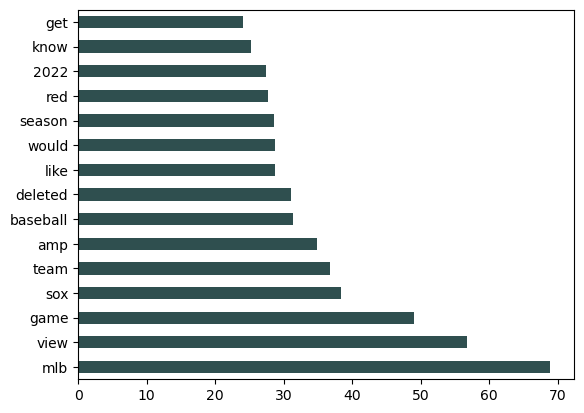

In [286]:
# Instantiate the Tfidf Vectorizer and transform 
tvec = TfidfVectorizer(stop_words=stopword_list)
post_matrix = tvec.fit_transform(reddit['selftext'])

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = tvec.get_feature_names_out())

print(post_df.shape)
post_df.sum().sort_values(ascending=False).head(15).plot(kind = 'barh', color='darkslategray');

In [287]:
# may be important to adjust stop words parameter when modeling - common words coming up across both subreddits 
# and are not necessarily indicative of sentiment (e.g "www", "removed", "just", "com", "https")

In [288]:
# write cleaned dataframes to csv's for use in modeling and preprocessing
print(redsox.shape)
redsox.head()

(1260, 12)


,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments,post_char_length,post_word_count
2,redsox,RedSoxGameday,### Line Score - Final\n\n| |1|2|3|4|5|6|7|8|9...,1655863639,False,False,1,Post Game Thread: 6/21 Tigers @ Red Sox,1.0,0,3163,209
3,redsox,jidionismydaddy69,[removed],1655861665,False,False,1,Red Sox Code Word June 21 2022,1.0,0,9,1
4,redsox,cheekofin,"Hey everyone,\n\nLet’s keep the votes going an...",1655855435,False,False,1,All Star Game,1.0,0,201,34
6,redsox,RedSoxGameday,**First Pitch**: 7:10 PM at Fenway Park\n\n---...,1655842209,False,False,1,Game Thread: 6/21 Tigers (26-41) @ Red Sox (37...,1.0,0,1443,55
7,redsox,ledzep2isbetterthan4,"4th place team with racist fans, keep sucking ...",1655838987,False,False,1,Literal shit franchise/city,1.0,0,63,11


In [289]:
print(mlb.shape)
mlb.head()

(1259, 12)


,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments,post_char_length,post_word_count
3,mlb,Jay_Subabove,"This batter is hitting .191 with 3HR, 12 RBI, ...",1655862592,False,False,1,Am I crazy?,1.0,0,263,53
8,mlb,Stress_Factor,"Not a Yankees fan, but modern day record looki...",1655856890,False,False,1,MLB Record (Wins),1.0,0,96,19
11,mlb,jah05r,Imagine that the Topps Now line had been a par...,1655849497,False,False,1,What would have been the most popular Topps No...,1.0,0,981,171
14,mlb,Cravenmorhed69,Ty France should be starting at 1B for the AL ...,1655847116,False,False,1,I encountered a rather significant problem in ...,1.0,0,367,73
15,mlb,Stress_Factor,You know baseball is your life when you barter...,1655844181,False,False,1,DFA,1.0,0,185,38


In [290]:
print(reddit.shape)
reddit.head()

(2519, 12)


,subreddit,author,selftext,created_utc,author_premium,is_video,score,title,upvote_ratio,num_comments,post_char_length,post_word_count
0,0,Jay_Subabove,"This batter is hitting .191 with 3HR, 12 RBI, ...",1655862592,False,False,1,Am I crazy?,1.0,0,263,53
1,0,Stress_Factor,"Not a Yankees fan, but modern day record looki...",1655856890,False,False,1,MLB Record (Wins),1.0,0,96,19
2,0,jah05r,Imagine that the Topps Now line had been a par...,1655849497,False,False,1,What would have been the most popular Topps No...,1.0,0,981,171
3,0,Cravenmorhed69,Ty France should be starting at 1B for the AL ...,1655847116,False,False,1,I encountered a rather significant problem in ...,1.0,0,367,73
4,0,Stress_Factor,You know baseball is your life when you barter...,1655844181,False,False,1,DFA,1.0,0,185,38


**I'm confident based on differences in the types of words that appear most often, and in the length of posts (as defined by word count and character length), that I'll be able to develop a model that distinguishes between the Red Sox and MLB subreddits.**

*Consider using unique authors to evaluate sentiment of each site*

-----
### Write the cleaned dataframe to a csv for preprocessing and modeling

In [291]:
reddit.to_csv('../data/reddit_cleaned.csv', index=False)